In [4]:
import itertools
import json
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
from time import time

from strategies import strategies, compare, metrics
from trees import *

%load_ext autoreload
%autoreload 2

import warnings

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
ftrs_dir = '../../../../data/features'
features_path = f'{ftrs_dir}/gaia-sdss/features.csv'
features = pd.read_csv(features_path)

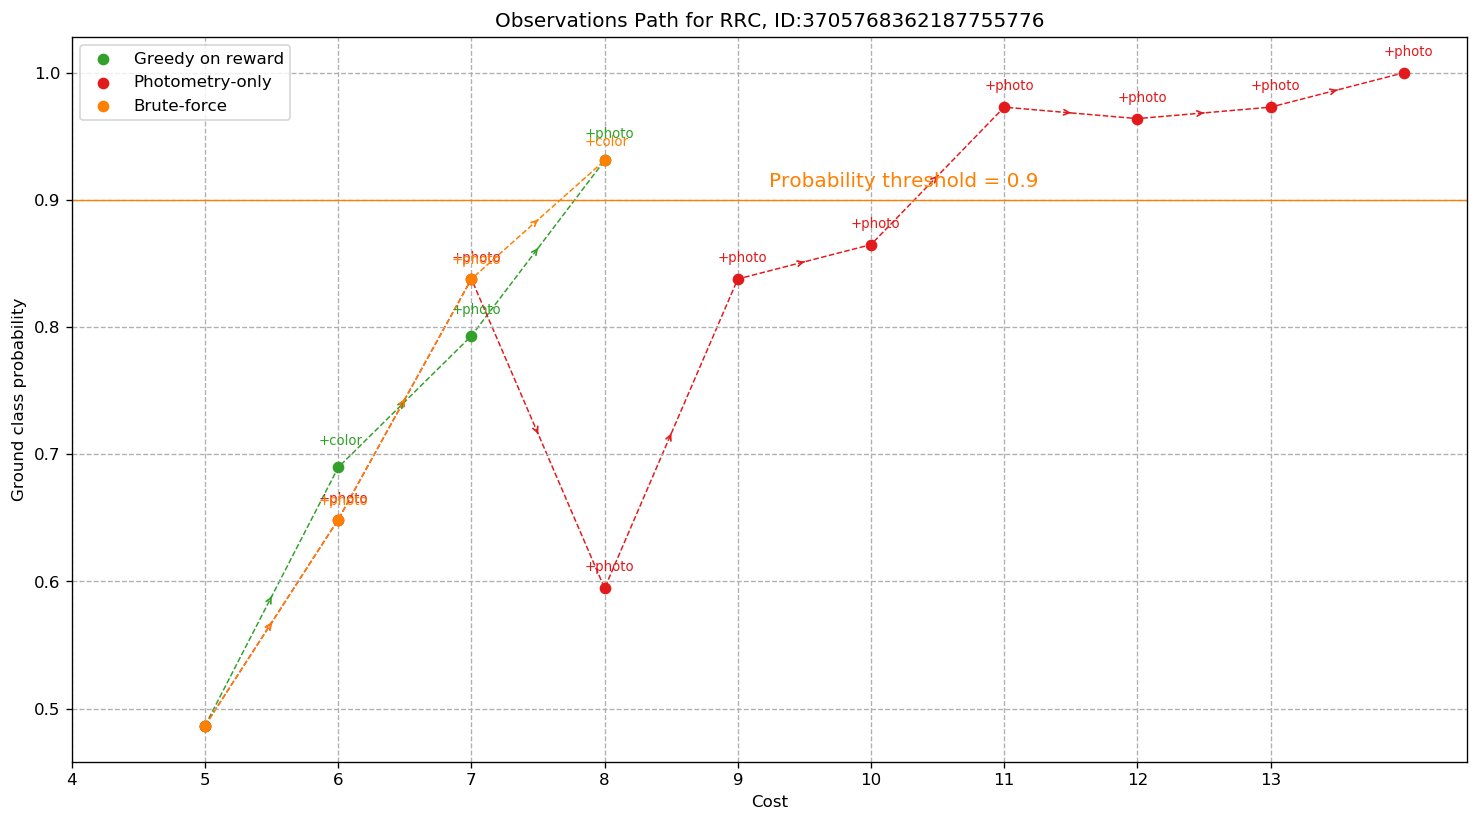

In [33]:
palette = sns.color_palette('Paired')
# all_features = features.set_index('id_gaia').loc[[2766433996366826112]].reset_index().iloc[0]
all_features = features.set_index('id_gaia').loc[[3705768362187755776]].reset_index().iloc[0]
all_clf = pickle.load(open('../../rf/classifiers.pkl', 'rb'))
p_thres = 0.9

tree_args = {'cost_obs': 1, 
             'cost_spec': 5, 
             'cost_col': 1, 
             'all_features': all_features, 
             'all_clf': all_clf,
             'p_thres':p_thres,
             'cost_coeff': 0.025
            }
root_args = {'n_obs': 5, 
             'n_spec': 0, 
             'n_color': 0
            }

fig, ax = plt.subplots(figsize=(15,8), dpi=120)

# greedy_prob = GreedyTree(greedy_on='probability', strategy_name='prob_greedy', **tree_args)
# greedy_prob.create_root(**root_args)
# greedy_prob.build_greedy()
# greedy_prob.plot_path(ax, 'Greedy on probability', palette[1])

greedy_reward = GreedyTree(greedy_on='reward', strategy_name='reward_greedy', **tree_args)
greedy_reward.create_root(**root_args)
greedy_reward.build_greedy()
greedy_reward.plot_path(ax, 'Greedy on reward', palette[3])

photo = PhotoTree(**tree_args, strategy_name='photometry_only')
photo.create_root(**root_args)
photo.build_tree()
photo.plot_path(ax, 'Photometry-only', palette[5])

brute = BruteForceTree(**tree_args, strategy_name='brute_force')
brute.create_root(**root_args)
brute.build_tree()
brute.plot_path(ax, 'Brute-force', palette[7])

# random = RandomTree(**tree_args, strategy_name='random')
# random.create_root(**root_args)
# random.build_tree()
# random.plot_path(ax, 'Random', palette[9])
# brute.plot_reward_contour(ax, reward=0.7, color='purple')

plt.title('Observations Path for '+all_features.label+ ', ID:'+str(all_features.id_gaia))
plt.show()

In [13]:
greedy_reward = GreedyTree(greedy_on='reward', strategy_name='reward_greedy', **tree_args)
greedy_reward.create_root(**root_args)
greedy_reward.build_greedy()
greedy_reward.plot_path(ax, 'Greedy on reward', palette[3])
plt.show()

{'photo': 7, 'spectrum': 0, 'color': 1}

In [25]:
info = brute.strategy_info()
info.update(brute.best_path[-1].settings)
info

{'gaia_id': 3705768362187755776,
 'strategy': 'brute_force',
 'probability': 0.9310344827586207,
 'reward': 0.7310344827586206,
 'cost': 8,
 'prediction': 'RRC',
 'label': 'RRC',
 'photo': 7,
 'spectrum': 0,
 'color': 1}

In [27]:
info2 = brute.strategy_info()
info2.update(brute.best_path[-1].settings)
info2

{'gaia_id': 3705768362187755776,
 'strategy': 'brute_force',
 'probability': 0.9310344827586207,
 'reward': 0.7310344827586206,
 'cost': 8,
 'prediction': 'RRC',
 'label': 'RRC',
 'photo': 7,
 'spectrum': 0,
 'color': 1}

In [29]:
pd.DataFrame([info, info2])

,color,cost,gaia_id,label,photo,prediction,probability,reward,spectrum,strategy
0,1,8,3705768362187755776,RRC,7,RRC,0.931034,0.731034,0,brute_force
1,1,8,3705768362187755776,RRC,7,RRC,0.931034,0.731034,0,brute_force


In [30]:
sett_path = 'strategies/settings8.json'

with open(sett_path) as f:
    sett = json.load(f)

In [34]:
sett['tree_args']

{'cost_obs': 1,
 'cost_spec': 5,
 'cost_col': 1,
 'cost_coeff': 0.025,
 'p_thres': None}

In [36]:
sett['root_args']

{'n_obs': 5, 'n_spec': 0, 'n_color': 0}

In [43]:
list(sett['tree_args'].values())

[1, 5, 1, 0.025, None]

In [44]:
ftrs_dir = '../../../../data/features'
clf_path =  '../../rf/classifiers.pkl'
features_path = f'{ftrs_dir}/gaia-sdss/features.csv'
settings_path = 'strategies/settings8.json'
splits_path = '../../splits.pk'
save_path = './exhaustive.csv'

with open(splits_path, 'rb') as f:
    splits = pickle.load(f)

In [53]:
np.concatenate(list(splits.values()))

array([2510205009220709504,  904839451946700544, 1314394957628674176, ...,
        306509482085779968, 2558898496564397696, 3697543396736371456])

In [60]:
with open('../player/runs_0/models/summary.pk', 'rb') as f:
    summary = pickle.load(f)

In [61]:
summary

{'model_3': {'rewards': {'random': 0.5421522675792124,
   'baseline': 0.5332314226289557,
   'rl': 0.6585547122074636},
  'episode': 3600},
 'model_2': {'rewards': {'random': 0.5247128389917763,
   'baseline': 0.5328107806523367,
   'rl': 0.6515323219545232},
  'episode': 3000},
 'model_1': {'rewards': {'random': 0.5294040979050467,
   'baseline': 0.5378130487475838,
   'rl': 0.6386000261949029},
  'episode': 600}}